# 1. 파이썬

1. 파이썬에서는 tab보다 공백 문자 4개를 권장한다. (검색해보니 "파이썬 코딩 스타일 가이드(PEP 8)에서는 공백 4칸으로 규정하고 있습니다" 라고 한다)
2. class의 메소드들은 첫 번째 인수로 자신(self)를 사용한다.
3. 브로드 캐스트 : 형상이 다른 배열끼리 연산
4. 파이썬(동적 언어)는 C,C++(정적 언어)보다 처리속도가 느리다. -> 빠른 성능이 요구되는 부분은 C,C++로 해결 (Numpy도 주된 처리는 C,  C++로 구현)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label ="sin")
plt.plot(x, y2, linestyle ="--", label ="cos")
plt.xlabel("x")
plt.ylabel("y")
plt.title("sin&cos")
plt.legend() # 8, 9번 줄의 label을 자동으로 가져온다.
plt.show()

# 2. 퍼셉트론

In [ ]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7 # AND 진리표를 만족하는 임의의 값을 넣어줌
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))


편향을 도입
b = -theta 로 해서
b + w1x1 + w2x2 가 0보다 작으면 0, 크면 1

In [ ]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7
print(w*x)
print(np.sum(w*x))
print(np.sum(w*x) + b)

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))


가중치와 편향은 기능이 다르다.

가중치는 입력신호가 결과에 주는 영향력(중요도) 조절하는 매개변수
편향은 뉴런이 얼마나 쉽게 활성화하느냐를 조정하는 매개변수

In [ ]:
# NAND 게이트

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

In [ ]:
# OR 게이트 (AND게이트와 가중치 w, b만 다르다)
# b가 두 개의 w보다 작아야한다? - 내 생각

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

XOR게이트는 배타적 논리합이라는 논리 회로.
둘 중 하나만 1일때 1을 출력

퍼셉트론으로는 비선형 영역을 나타낼 수 없어서 XOR 게이트를 표현 불가
-> "다층 퍼셉트론을 만들 수 있다"는 점에서 장점이 있다.

조합을 통해서 XOR게이트를 만든다.

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

XOR게이트는 다층 퍼셉트론이다

퍼셉트론은 층을 거듭 쌓으면 비선형적인 표현도 가능하고 컴퓨터가 수행하는 처리 모두 표현할 수 있다.

# 3. 신경망

퍼셉트론의 가중치들을 사람이 수동적으로 해야한다 -> 신경망이 이것을 해결.

가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질이다.

신경먕은 입력층 -> 은닉층 -> 출력층 으로 구성

활성화 함수 : 활성화하는 역할 ( 0보다 크면 1 아니면 0 출력 - 계단 함수 )
ex) y = h(b + w1x1 + w2x2)

활성화 함수는 퍼셉트론에서 신경망으로 가기 위한 길잡이

*일반적으로 
(단순) 퍼셉트론 : 단층 네트워크에서 계단 함수를 활성화 함수로 사용한 모델
다층 퍼셉트론 : 신경망 (시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)



활성화 함수 (계단 함수를 다른 함수로 변경하는 것이 신경망으로 나아가는 열쇠)

(0). 계단 함수
h(x) = 1 if x>0 / 0 else

1. 시그모이드 함수
h(x) = 1 / 1 + e^-x

In [ ]:
# 계단 함수 구현

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

def step_function(x): # 넘파이 배열까지 지원하는 계단 함수
    y = x > 0
    return y.astype(np.int)

In [ ]:
# 계단 함수 그래프

import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1) # x 값 설정
y = step_function(x) # y값 설정
plt.plot(x, y) # 그리기
plt.ylim(-0.1, 1.1) # y값 그래프 범위 설정
plt.show()


In [ ]:
# 시그모이드 함수 구현

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

In [ ]:
# 시그모이드 함수 그래프

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

계단 함수와 비교했을때 시그모이드 함수는 곡선을 나타낸다.
-> 이 점이 신경망 학습에서 아주 중요한 역할을 한다.

공통점 : 비선형 함수이다. (하나의 직선으로 그릴 수 없다)
-> 신경망에서는 활성화 함수로 비선형 함수를 사용해야함.


ReLU 함수
h(x) = x if x>0 / 0 else

In [ ]:
#ReLU 함수 그래프

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.5, 5.5)
plt.show()

행렬의 곱 - 1차원:벡터, 2차원:행렬 곱
np.dot(A, B) != np.dot(B, A)

2x3행렬, 2x2 행렬 곱 연산시 오류 출력 A의 열 수와 B의 행 수를 맞추어야함




In [ ]:
# 입력층에서 1층으로 신호 전달
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

# 전달된 신호
A1 = np.dot(X, W1) + B1

In [ ]:
# 1층에서 활성화 함수 사용 후 Z1에 저장
Z1 = sigmoid(A1)

print(A1)
print(Z1)

In [ ]:
# 1층에서 2층으로 신호 전달

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

# 전달된 신호
A2 = np.dot(Z1, W2) + B2

# 2층에서 활성화 함수 사용
Z2 = sigmoid(A2)

print(A2)
print(Z2)

In [ ]:
# 2층에서 출력층으로 신호 전달

def identity_function(x): # 항등 함수 (흐름을 통일하기 위해 그냥 구현)
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(A3)
print(Y)

In [ ]:
# 구현 정리

def init_network(): # 가중치와 편향 초기화
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['B3'] = np.array([0.1, 0.2])

    return network

def forward(network, x): # 신호가 순방향으로 전달
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']

    a1 = np.dot(x, W1) + B1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + B2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + B3
    y = identity_function(a3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

In [ ]:
## 소프트맥스 함수

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

## 출력층의 뉴런 수 정하기

분류에서 분류하고 싶은 클래스 수로 설정하는 것이 일반적임
ex) 숫자 0~9 분류 -> 출력층 뉴런은 10개

## 손글씨 숫자 인식

학습된 매개변수 사용, 학습 과정 생략, 추론 과정(순전파)만 구현

### MNIST 데이터셋



In [ ]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)

MNIST의 인수 3 가지 (bool 값)
1. normalize : True 픽셀 값을 0~1.0, False 픽셀 값을 0부터 255 사용
2. flatten : True 이미지를 1차원 배열로, False 3차원 배열로
3. one-hot-encoding : True 0, 1의 배열로 나타냄, False 숫자 형태의 레이블 저장 

## 신경망의 추론 처리

입력층 뉴런 : 784개 (28*28, 아마 픽셀의 개수?)
출력층 뉴런 : 10개 (0~9 숫자 분류)
은닉층 뉴런 : 1번-50개 뉴런, 2번-100개 뉴런 (임의의 개수)


정규화(normalization) : 데이터를 특정 범위로 변환하는 처리 (전처리의 일종?)
전처리(pre-processing) : 신경망의 입력 데이터에 특정 변환을 가하는 것

데이터 백색화(whitening) : 데이터를 균일하게 분포시키는 정규화?

In [ ]:
import pickle
import numpy as np

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=False, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("./ch03/sample_weight.pkl", 'rb') as f: # .이 현재 디렉토리를 뜻함
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
    
print("Accuray:" + str(float(accuracy_cnt) / len(x)))

## 배치 처리

전체적으로 보면 28*28인 2차원 배열 -> 원소가 10개인 1차원 배열 출력

배치(batch) : 하나로 묶은 입력 데이터
(수치 계산 라이브러리는 대부분 큰 배열을 효율적으로 처리할 수 있도록 최적화되어 있음
버스에 부하를 줄인다 -> CPU, GPU의 순수 계산 수행 비율이 증가)

100개의 이미지 묶음을 한꺼번에 입력 -> 100*10의 2차원 배열 출력 (속도가 더 빠름)



In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


# 3장 정리

신경망 - 활성화 함수로 시그모이드 함수 (매끄럽게 변화하는 함수)
퍼셉트론 - 활성화 함수로 계단 함수 사용

# 4장 신경망 학습

학습 : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것

신경망이 학습할 수 있도록 해주는 지표인 손실 함수를 공부할 예쩡
(손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 목표)
-> 함수의 기울기를 활용하는 경사법

## 데이터 주도 학습

기계학습의 중심에는 데이터가 존재 -> 주어진 데이터에서 특징을 추출해 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다. (이미지의 특징은 보통 벡터로 기술)

신경망(딥러닝)은 데이터 그대로를 입력 데이터로 활용해 학습한다. 
(사람의 개입이 전혀 없이 기계가 스스로 학습)

## 훈련 데이터와 시험 데이터

훈련 데이터만 사용해 최적의 매개변수를 찾는다.
시험 데이터를 사용해 훈련한 모델의 실력을 평가

나누는 이유? - 범용 능력을 제대로 평가하기 위해서 (아직 보지 못한 데이터를 풀어내는 능력)

오버피팅 : 한 데이터셋에만 지나치게 최적화된 상태

## 손실 함수

신경망 학습에서는 손실 함수를 기준으로 최적의 매개변수 값을 찾는다.
(훈련 데이터를 얼마나 잘 처리하지 못하느냐를 나타냄)

일반적으로 오차제곱합과 교차 엔트로피 오차를 사용



In [ ]:
# 오차제곱합

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 교차 엔트로피 오차

def cross_entropy_error(y, t):
    delta = 1e-7 # 델타값들 더하는 이유는 0일 경우 -inf가 되는 것을 방지
    return -np.num(t * np.log(y +delta))
    

## 미니배치 학습

기계학습에서 손실 함수 값을 최대한 줄여주는 매개변수(가중치, 편향)를 찾아야함.
따라서 모든 훈련 데이터에 대한 손실 함수 값 구해야함.

하지만 모든 데이터에 대한 손실 함수 값을 구해 평균 내는 것은 힘들다.
-> 미니배치를 통해 많은 데이터 중 일부만 무작위로 뽑아 학습을 한다.

In [ ]:
# 10개만 무작위로 뽑음

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 뽑아내기
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print("x_batch:", x_batch)
print("t_batch:", t_batch)

In [ ]:
np.random.choice(60000, 10)

## (배치용) 교차 엔트로피 오차 구현하기

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

왜 손실 함수를 설정하는가?
-> 높은 정확돌르 끌어내는 매개변수를 찾는 것이 궁극적인 목적
이때 매개변수릐 미분을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복

미분값이 음수면 가중치를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있음
미분값이 양수면 가중치를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있음
미분값이 0이면 변화시켜도 손실 함수의 값이 줄어들지 않는다. -> 갱신 멈춤


*신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.
why? 정확도는 33% -> 34% 로 불연속적인 값으로 변화하기 때문에 미소한 변화에는 거의 반응을 보이지 않기 때문이다.
이것은 또한 활성화 함수로 계단 함수를 사용하지 않는 이유가 될 수 있음.

시그모이드 함수는 미분이 0이 되지 않음

## 4.3 수치미분

경사법에서는 기울기 값을 기준으로 나아갈 방향을 정합니다.

미분시 주의사항
1. 극한 h->0에서 h로 0에 가까운 값을 넣기 위해 너무 작은 값을 넣으면 반올림 오차로 인해 0이 되어버린다. -> h로 10^-4 정도의 값 사용
2. 함수의 차분 -> 중앙 차분 이용하기

적용한 수치 미분 구현(아래)

In [ ]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

## 4.3.2 수치 미분의 예
y = 0.01x^2 + 0.1x

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [ ]:
numerical_diff(function_1, 5)

In [ ]:
numerical_diff(function_1, 10)

## 4.3.3 편미분

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [ ]:
# x0 = 3, x1 = 4 편미분 x0

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

In [ ]:
# x0 = 3, x1 = 4 편미분 x1

def function_tmp2(x1):
    return 3.0**2 + x1**2.0

numerical_diff(function_tmp2, 4.0)

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h 
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

** 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄인느 방향 **

## 4.4.1 경사법 (경사 하강법) - 기계학습을 최적화하는데 흔히 쓰는 방법

기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사 하강법임

기울기가 가리키는 곳에 최솟값이 있는지는 보장할 수 없음.

기울기가 가리키는 방향으로 일정거리 이동 후 다시 기울기 측정 
-> 반복하여 함수의 값을 점차 줄이는 것이 경사법

경사법을 수식으로 나타낸 것에서 에타 기호는 갱신하는 양을 나타내고 신경망 학습에서는 이를 학습률이라고 부른다.

이 학습률 값은 미리 특정 값으로 정해두어야 하는데, 너무 크거나 작으면 좋은 장소를 찾아갈 수 없다. 신경망 학습에서는 학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행한다.

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

**학습률이 너무 크거나 작으면 좋은 결과를 얻을 수 없음**

In [ ]:
import sys, os
sys.path.append("/home/bmk/repos/DeepLearning/deep-learning-from-scratch-master")
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [ ]:
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p)

t = np.array([0, 0, 1])
net.loss(x, t)

In [ ]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

In [ ]:
f = lambda w: net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

## 4.5 학습 알고리즘 구현하기

신경망 학습의 순서

전제. 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다. 신경망 학습은 다음과 같이 4단계로 수행

1단계. 미니배치 - 훈련 데이터 중 일부를 무작위로 가져옴. 선별한 데이터를 미니배치라 부르고 미니배치의 손실 함수 값을 줄이는 것이 목표

2단계. 기울기 산출 - 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수 값을 가장 작게 하는 방향을 제시

3단계. 매개변수 갱신 - 매개변수를 기울기 방향으로 아주 조금 갱신(이동)

4단계. 반복 - 1~3 단계 반복



경사 하강법으로 매개변수를 갱신하는 방법이며, 미니배치로 무작위 선정하기 때문에 확률적 경사 하강법(SGD)이라 부름.

In [13]:
# 2층 신경망 클래스 구현하기

import sys, os
sys.path.append("/home/bmk/repos/DeepLearning/deep-learning-from-scratch-master")
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        # params : 신경망의 매개변수를 보관하는 딕셔너리 변수
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    # 예측(추론)
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    # 손실 함수의 값을 계산
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    # 정확도 구하기
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        # grads : 신경망 매개변수의 기울기를 보관하는 딕셔너리 변수
        # loss_W에는 추론을 하고 정답 레이블과 비교하여 교차 엔트로피 방식으로 구한 손실 함수의 크기를 저장하는 변수이고
        # grads 에는 신경망 매개변수를 조금 변화시켰을때 손실 함수가 얼마나 변하는지(기울기)를 저장
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [14]:
# 미니배치 학습 구현하기

import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train_acc, test acc : ", str(train_acc) + ", " + str(test_acc))


train_acc, test acc :  0.09865, 0.0958


KeyboardInterrupt: 

# Chapter 5 오차역전파법

가중치 매개변수의 기울기를 효율적으로 계산하는 방법임

### 계산 그래프

그래프 자료구조로 복수의 노드와 에지로 표현됨

이점 1. 국소적 계산 - 복잡한 계산을 단순화할 수 있음

이점 2. 중간 계싼 결과를 모두 보관 가능

이점 3. (가장큰 이점) 역전파를 통해 미분을 효율적으로 계산할 수 있음




In [ ]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        
        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

In [3]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)


220.00000000000003
2.2 110.00000000000001 200


In [4]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

### 5.5 활성화 함수 계층 구현하기

신경망을 구성하는 층(계층) 각각을 클래스 하나로 구현함.

In [ ]:
# Relu 계층
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [10]:
# 그냥 궁금해서 출력해봄
import numpy as np
x = np.array([[1.0, -1.0], [1.0, -1.0]])

mask = (x <= 0)
print(mask)
out = x.copy()
print(out)
out[mask] = 0
print(out)

[[False  True]
 [False  True]]
[[ 1. -1.]
 [ 1. -1.]]
[[1. 0.]
 [1. 0.]]


In [2]:
# Sigmoid 계층
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return x

### 5.6 Affine / Softmax 계층 구현하기

Affine 계층 : 행렬의 곱 계산의

In [4]:
# np.dot()으로 구현한  Affine 계층
import numpy as np

X = np.random.rand(2)
W = np.random.rand(2, 3)
B = np.random.rand(3)

X.shape
W.shape
B.shape

Y = np.dot(X, W) + B

print(Y)

[0.43658199 1.05862616 1.23458061]


In [5]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.B

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(Self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        return dx

### 5.6.3 Softmax with Loss 계층

마지막 출력층에서 사용하는 함수이자 정규화를 해준다.
정규화 : 출력의 합이 1이 되도록 변형 -> 확률으로 해석 가능

softmax함수를 지나기 전 affine함수의 출력을 점수(score)라고 부름

소프트맥스 함수와 손실함수(교차 엔트로피 오차)를 합쳐 softmax_with_loss 계층으로 구현

In [6]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx

### 5.7.2 오차역전파법을 적용한 신경망 구현하기

In [15]:
import sys, os
sys.path.append("/home/bmk/repos/DeepLearning/deep-learning-from-scratch-master")
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return X
    
    def loss(self, x ,t):
        y = self.predict(x)

        return self.lastLayer.forward(y, t)

    def accuracy(self, x ,t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        
        if t.ndim != 1 :
            t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])

        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)

        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads

### 5.7.3 오차역전파법으로 구한 기울기 검증하기

In [10]:
import sys, os
sys.path.append("/home/bmk/repos/DeepLearning/deep-learning-from-scratch-master")
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 차이의 절대값을 구한 후, 그 절댓값들의 평균을 낸다.
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" + str(diff))

W1:1.9842782110892633e-10
b1:9.001236058868867e-10
W2:6.800829377748285e-08
b2:1.3590310279920637e-07


수치 미분으로 구한 기울기와 오차역전파법으로 구한 기울기의 오차가 매우 작음을 확인함 -> 오차역전파법으로 구한 기울기의 신뢰도 상승

In [16]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)
print(train_loss_list)

0.09915 0.1009
0.7928333333333333 0.7996
0.8795666666666667 0.8854
0.89925 0.9027
0.9091333333333333 0.9109
0.91525 0.9174
0.9207333333333333 0.9223
0.9255666666666666 0.9265
0.92835 0.9296
0.93315 0.9333
0.9353666666666667 0.9344
0.9381666666666667 0.9374
0.9406 0.9391
0.94315 0.941
0.9446833333333333 0.9418
0.9470166666666666 0.9436
0.9483166666666667 0.9454
[2.289384362893727, 2.2855500884718047, 2.303066107707427, 2.2955139478562563, 2.289409649974157, 2.2986618737532125, 2.2875996402143857, 2.2933441184926555, 2.291856783010429, 2.2832900519323753, 2.3005787405098506, 2.298175632836733, 2.267766283835683, 2.3003671259488243, 2.2973922631482675, 2.2880331812337387, 2.282025224677511, 2.293658995880088, 2.2759265224190663, 2.295869944385898, 2.2939379827068613, 2.2788521686414795, 2.2942234755365543, 2.281930470985334, 2.2838004275475914, 2.2880509036708943, 2.2916076083017103, 2.2926157905621736, 2.2953135360485586, 2.284968403896262, 2.287261322993194, 2.300856065855106, 2.2964712

### 5장 정리

- 계산 그래프를 이용하면 계산 과정을 시각적으로 파악할 수 있다.
- 계산 그래프의 노드는 국소적 계산으로 구성된다. 국소적 계산을 조합해 전체 계산을 구성한다.
- 계산 그래프의 순전파는 통상의 계산을 수행한다. 한편, 계산 그래프의 역전파로는 각 노드의 미분을 구할 수 있다.
- 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산할 수 있다.(오차역전파법)
- 수치 미분과 오차역전파법의 결과를 비교하면 오차역전파법의 구현에 잘못이 없는지 확인할 수 있다.(기울기 확인)

# Chapter 6. 학습 관련 기술들

가중치 매개변수의 최적값을 탐색하는 최적화 방법, 가중치 매개변수 초깃값, 하이퍼 파라미터 설정 방법
오버피팅의 대응책인 가중치 감소와 드롭아웃 등의 정규화 방법도 간략히 설명하고 구현
배치 정규화

위 기법들을 이용해 신경망 학습의 효율과 정확도를 높일 수 있다.

### 6.1 매개변수 갱신

매개변수의 기울기(미분)을 이용해 최적값을 찾는 확률적 경사 하강법(SGD)를 사용했음
이거보다 똑똑한 방법이 있음. -> SGD의 단점을 알아보고 더 좋은 방법을 사용해보자

In [12]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def updatd(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 6.1.4 모멘텀

SGD의 단점 : 기울기가 정확히 최적값을 가리키지 않음
-> 모멘텀 기법 나옴

W <- W + v

v : 속도

In [15]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

### 6.1.5 AdaGrad

신경망 학습에서는 학습률 값이 중요하다. 이 값이 너무 작으면 학습 시간이 길어지고 너무 크면 발산하여 학습이 제대로 이뤄지지 않음.

학습률을 정하는 효과적인 기술로 학습률 감소(learning rate decay)가 있음
학습률 감소(learning rate decay) : 처음에는 크게 학습하다가 조금씩 작게 학습하기

학습률 감소가 매개변수의 원소마다 다르게 적용됨


최솟값을 향해 효율적으로 움직이는 것을 알 수 있음.

In [16]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 0을 0으로 나누는 경우를 막아줌

### 6.1.6 Adam

모멘텀과 AdaGrad를 합친것
common/potimizer.py에 구현해두었다고 함

### 6.1.7 어느 갱신 방법을 이용할 것인가?

1. SGD
2. 모멘텀
3. AdaGrad
4. Adam

문제에 따라, 하이퍼파라미터를 어떻게 설정하느냐에 따라 결과가 바뀐다.

항상 뛰어난 기법은 아직 없다. 각자 장단점이 있어 문제에 따라 좋은게 있다.

### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

 AdaGrad가 가장 빠르고 SGD가 가장 느리다.

## 6.2 가중치의 초깃값

신경망 학습에서 특히 중요한 것이 가중치의 초깃값이다. 

### 6.2.1 초깃값을 0으로 하면?

오버피팅을 억제해 범용 성능을 높이는 테크닉 : 가중치 감소 기법

가중치 감소는 가중치 매개변수의 값이 작아지도록 학습하는 방법이다.
가중치 값을 작게 하여 오버피팅이 일어나지 않게 하는 것

하지만 가중치 값을 작게 하기 위해서 초깃값을 0으로 해버리면 학습이 올바로 이뤄지지 않는다. (실제로 우리는 표준편차가 0.01인 정규분포를 사용해 가중치 초기값을 정했음)
why? : 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문!

### 6.2.2 은닉층의 활성화값 분포

활성화 함수로 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입려 데이터를 흘리며 각 층의 활성화값 분포를 히스토그램을 그려보자

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과(활성화값)을 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num) # 곱하는 값이 표준 편차로 적용
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

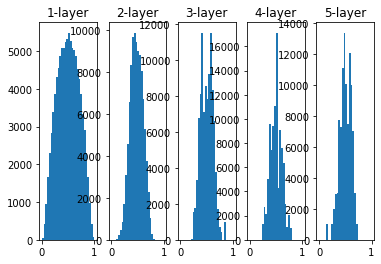

In [14]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

- 가중치 초깃값을 표준편차 1로 설정

각 층의 활성화값들이 0, 1에 치우쳐 분포되어있음 -> 시그모이드 함수에서는 0, 1에 가까워지면 미분값은 0에 다가간다.
따라서 데이터가 0, 1에 치우쳐 분표하게 되면 역전파의 기울기 값은 점점 작아지다가 사라진다.
이것은 기울기 소실이라 알려진 문제이다. 층을 깊게하는 딥러닝에서 기울기 소실은 심각한 문제가 될 수 있다.

- 가중치 초깃값을 표준편차 0.01로 설정 

0.5 부근으로 활성화값들이 치우친 것을 볼 수 있다.
기울기 소실 문제는 일어나지 않지만 뉴런 100개가 거의 같은 값을 출력한다면 뉴런 1개가 출력한 것과 별반 다를 게 없는 것이다. 따라서 표현력을 제한한다는 관점에서 문제가 된다.

* 각 층의 활성화 값은 고르게 분포되어야 한다. 적당하게 다양한 데이터가 흘러야 신경망 학습이 효율적으로 이뤄진다.

- 가중치 초깃값을 Xavier 초깃값으로 설정

각 층의 활성화값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾고자 했고 앞 계층의 노드가 n개라면 표준편차가 1/root(n)인 분포를 사용하면 된다는 결론을 이끌었다.

위 초깃값은 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다.

결과로 층이 깊어지면서 형태가 다소 일그러지지만 확실히 넓게 분포되는 것을 확인할 수 있었다. -> 시그모이드 함수의 표현력 제한도 받지 않고 학습이 효율적으로 이뤄질 것으로 기대된다.

모양이 일그러지는 것을 tanh 함수로 사용하면 개선된다.
sigmoid : 0, 0.5에서 대칭인 S 곡선
tanh : 0, 0에서 대칭인 S 곡선

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값

He 초깃값이다.
앞 계층의 노드가 n개일 때, 표준편차가 root(2/n)인 정규분포 사용
Relu는 음의 영역이 0이라서 더 넓게 분포시키기 위해 Xavier 초깃값보다 2배의 계수가 필요하다고 해석 가능

ReLU에서 He 초깃값을 사용한 결과 모든 층에서 활성화값이 균일하게 분포되는 것을 확인할 수 있었다.

* 결론

Relu - He 초깃값 사용
Sigmoid, tanh 등의 S자 모양 곡선 - Xavier 초깃값 사용

## 6.3 배치 정규화

각 층이 활성화를 적당히 퍼뜨리도록 강제해버리기 : 배치 정규화

### 6.3.1 배치 정규화 알고리즘

배치 정규화가 주목받는 이유
1. 학습 속도 개선
2. 초깃값에 크게 의존 X
3. 오버피팅을 억제 (드롭아웃 등의 필요성 감소)

미니배치를 단위로 정규화한다.
m개의 입력 데이터의 집합에 대해 평균과 분산을 구하고 각각 0, 1이 되도록 적절히 정규화한다.
이 처리를 활성화 함수의 앞(또는 뒤)에 삽입함으로써 데이터 분포가 덜 치우치게 만든다.
또, 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대와 이동 변환을 수행한다.

### 6.3.2 배치 정규화의 효과

가중치 초깃값의 표준편차를 어떻게 하든 거의 모든 경우에서 배치 정규화를 사용했을 때의 학습 진도가 빠르다.
추가적으로 초깃값을 제대로 설정하지 않은 경우에도 배치 정규화를 통해 학습이 잘 이뤄지는 것을 확인할 수 있음

## 6.4 바른 학습을 위해

기계학습에서는 오버피팅이 문제가 되는 일이 많다. 
훈련 데이터에는 포함되지 않는 아직 보지 못한 데이터가 주어져도 바르게 식별해내는 몯레이 바람직하기 때문에 복잡하고 표현력이 높은 모델을 만들 수 있지만 그만큼 오버피팅을 억제하는 기술이 중요해짐.

### 6.4.1 오버피팅

오버피팅은 주로 두 경우에 일어난다.
1. 매개변수가 많고 표현력이 높은 모델
2. 훈련 데이터가 적음

### 6.4.2 가중치 감소

오버피팅 억제용으로 많이 이용해온 방법 가중치 감소

큰 가중치에 대해서는 큰 패널티를 부과하여 오버피팅을 억제하는 방법이다.
원래 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문

